# PHP 2022

## 4. Object-Oriented Programming

### 4.2 Exercise

Implement the below class diagram.

In [1]:
import iplantuml;

Writing output for /home/student/php_2022_g2_adam_lewinski/04_object_oriented/02_exercise/cf700bee-d2b2-4866-98de-9b626b529a9e.uml to cf700bee-d2b2-4866-98de-9b626b529a9e.svg


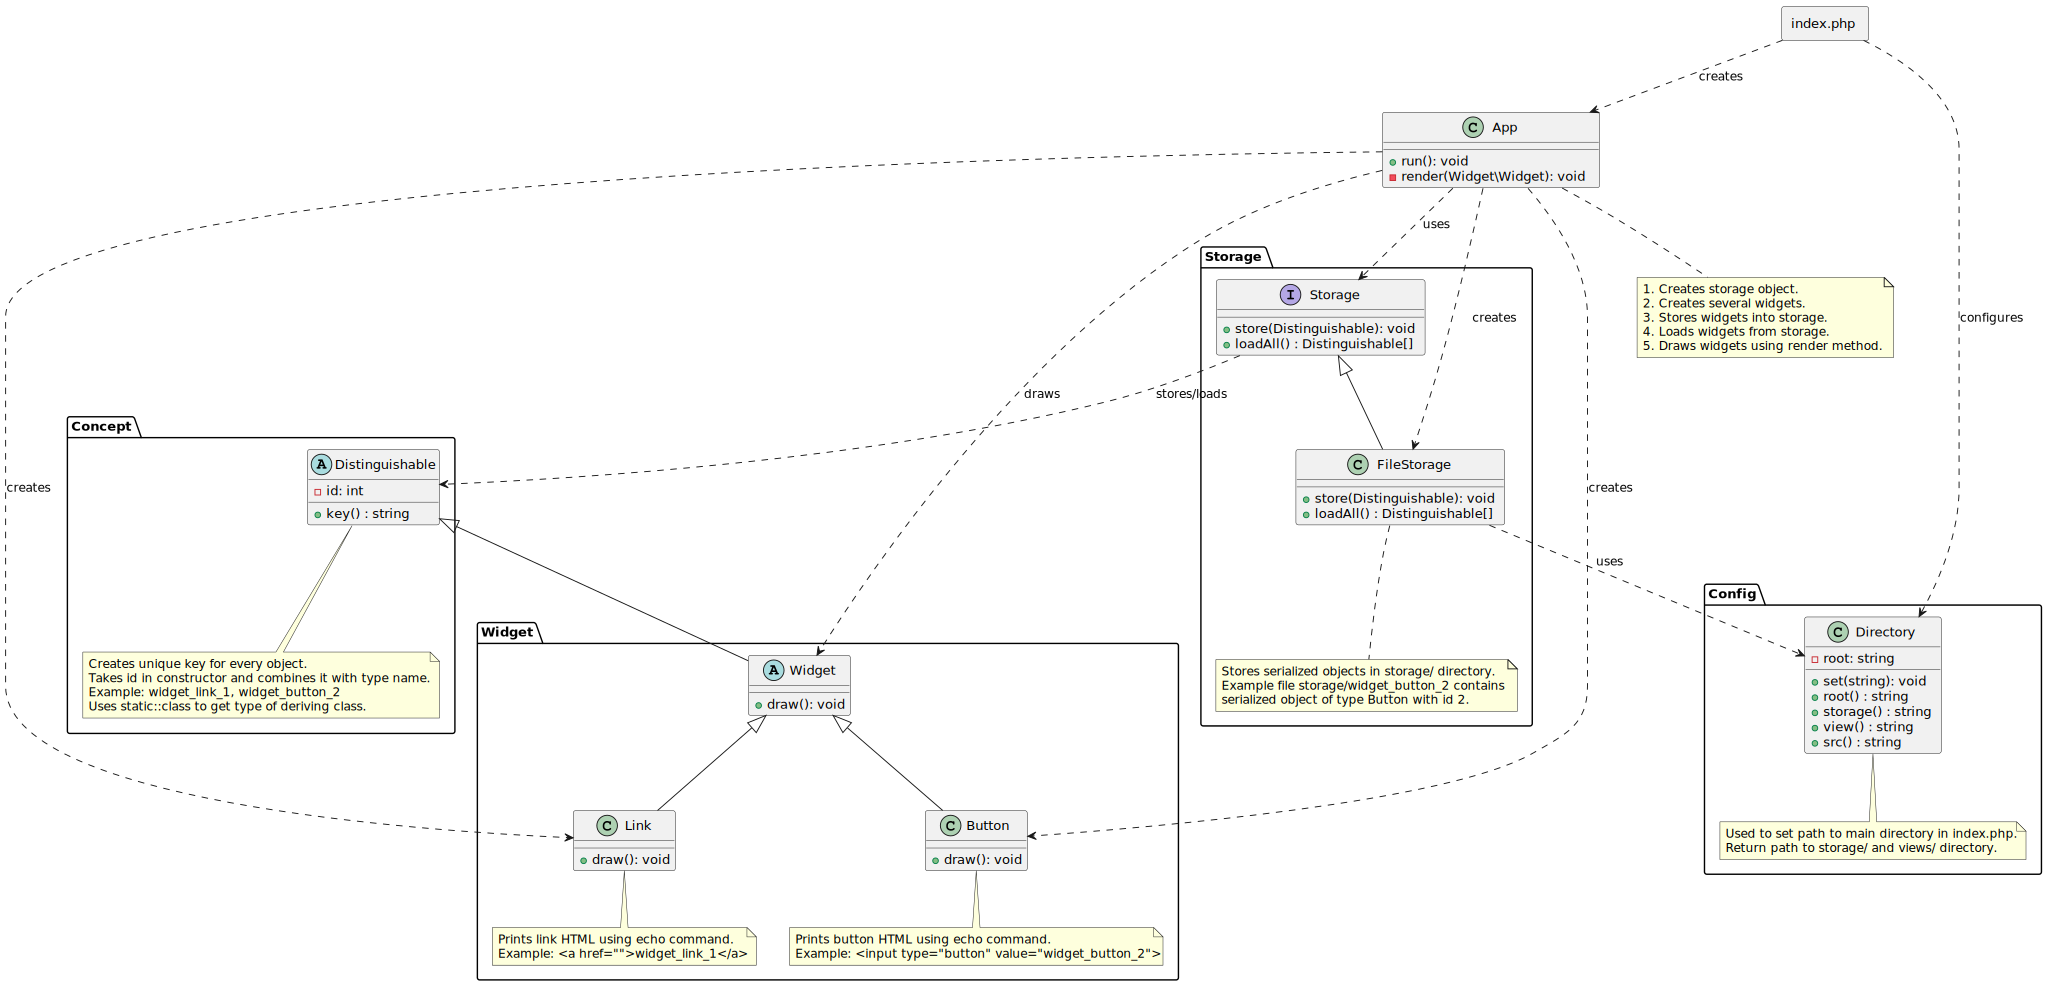

In [2]:
%%plantuml

@startuml

class App {
    + run(): void
    - render(Widget\Widget): void
}

note as AppNote
1. Creates storage object.
2. Creates several widgets.
3. Stores widgets into storage.
4. Loads widgets from storage.
5. Draws widgets using render method.
end note

App .. AppNote

namespace Widget {

    abstract class Widget {
        + draw(): void
    }

    class Link {
        + draw(): void
    }

    note as LinkNote
    Prints link HTML using echo command.
    Example: <a href="">widget_link_1</a>
    end note

    Link .. LinkNote

    class Button {
        + draw(): void
    }

    note as ButtonNote
    Prints button HTML using echo command.
    Example: <input type="button" value="widget_button_2">
    end note

    Button .. ButtonNote

    Widget <|-- Link
    Widget <|-- Button
}

App ..> Widget.Widget : draws
App ..> Widget.Button : creates
App ..> Widget.Link : creates

namespace Concept {

    abstract class Distinguishable {
        - id: int
        + key() : string
    }

    note as DistinguishableNote
    Creates unique key for every object.
    Takes id in constructor and combines it with type name.
    Example: widget_link_1, widget_button_2
    Uses static::class to get type of deriving class.
    end note

    Distinguishable .. DistinguishableNote
}

Concept.Distinguishable <|-- Widget.Widget

namespace Config {

    class Directory {
        - {static} root: string
        + {static} set(string): void
        + {static} root() : string
        + {static} storage() : string
        + {static} view() : string
        + {static} src() : string
    }

    note as DirectoryNote
    Used to set path to main directory in index.php.
    Return path to storage/ and views/ directory.
    end note

    Directory .. DirectoryNote
}

namespace Storage {

    interface Storage {
        + store(Distinguishable): void
        + loadAll() : Distinguishable[]
    }

    class FileStorage {
        + store(Distinguishable): void
        + loadAll() : Distinguishable[]
    }

    note as FileStorageNote
    Stores serialized objects in storage/ directory.
    Example file storage/widget_button_2 contains
    serialized object of type Button with id 2.
    end note

    FileStorage .. FileStorageNote

    Storage <|-- FileStorage
}

Storage.Storage ..> Concept.Distinguishable : stores/loads
Storage.FileStorage ..> Config.Directory : uses

App ..> Storage.FileStorage : creates
App ..> Storage.Storage : uses

package index.php <<Rectangle>> {
}

index.php ..> App : creates
index.php ..> Config.Directory : configures

@enduml

In [34]:
! phpstorm project

Info  | RdCoroutineScope          | 14:JobScheduler FJ pool 2/3 | RdCoroutineHost overridden 
2022-10-25 18:10:33,188 [   7251]   WARN - #c.i.o.a.i.ActionUpdater - 271 ms to grab EDT for CWMTelephonyGroup#update@NavBarToolbar (com.jetbrains.rd.platform.codeWithMe.telephony.CWMTelephonyGroup)
2022-10-25 18:10:41,728 [  15791]   WARN - #c.i.o.a.i.ActionUpdater - 3307 ms to grab EDT for #update@ToolwindowTitle (com.intellij.toolWindow.ToolWindowHeader$2)
2022-10-25 18:10:42,499 [  16562]   WARN - #c.i.o.a.i.ActionUpdater - 3307 ms total to grab EDT 1 times to expand @ToolwindowTitle (com.intellij.toolWindow.ToolWindowHeader$2). Use `ActionUpdateThread.BGT`.
2022-10-25 18:10:48,724 [  22787]   WARN - #c.i.o.a.i.ActionUpdater - 1698 ms to call on BGT ExecutorAction#update@NavBarToolbar (com.intellij.execution.ExecutorRegistryImpl$ExecutorAction)
2022-10-25 18:13:05,745 [ 159808]   WARN - #c.i.u.x.Binding - no accessors for org.jetbrains.idea.perforce.perforce.ConnectionId


You can test your solution using included tests:

In [13]:
! composer global require phpstan/phpstan

Changed current directory to /home/student/.composer
Info from https://repo.packagist.org: #StandWithUkraine
Using version ^1.8 for phpstan/phpstan
./composer.json has been updated
Running composer update phpstan/phpstan
Loading composer repositories with package information
Updating dependencies
Nothing to modify in lock file
Installing dependencies from lock file (including require-dev)
Nothing to install, update or remove
Generating autoload files
1 package you are using is looking for funding.
Use the `composer fund` command to find out more!
No security vulnerability advisories found


In [35]:
! ~/.composer/vendor/bin/phpstan analyze --level max project

  0/10 [░░░░░░░░░░░░░░░░░░░░░░░░░░░░]   0% 10/10 [▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓] 100%

 ------ ----------------------------------------------------------------------- 
  Line   src/Storage/FileStorage.php                                            
 ------ ----------------------------------------------------------------------- 
  16     Method Storage\FileStorage::loadAll() return type has no value type    
         specified in iterable type array.                                      
         💡 See:                                                                
         https://phpstan.org/blog/solving-phpstan-no-value-type-specified-in-i  
         terable-type                                                           
  21     Parameter #1 $array of function array_diff expects array, array<int,   
         string>|false given.                                                   
  29     Parameter #1 $data of function unserialize expects string,             
         string|false gi

In [19]:
import subprocess
phpServer = subprocess.Popen(['php', '-S', 'localhost:8888', '-t', 'project/public'])

[Tue Oct 25 17:36:49 2022] PHP 8.1.9 Development Server (http://localhost:8888) started


In [ ]:
! cd tests && composer install && vendor/bin/codecept run

In [31]:
phpServer.kill()